# **Detecting Mask Compliance**

**Note:** Since I did not want to build classifier with 17 different labels, I first combined subsets of the 17 different phrases into directories named 'masked', 'unmasked', and 'neither'. The 'neither' category contains images that do not contain a person.

Here, I built a model that is highly accurate in detecting whether an image contains a masked person. I used three categories because knowing whether there is actually someone attempting to use the detector seemed useful. Thus, this classifier differentiates between unmasked people and non-people.

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

## **Creating the Datasets**

Here the directory 'images_mask_classed' is where the preprocessed images were sorted into the three aforementioned subdirectories.

The data is split using Keras preprocessing into training and validation datasets.

The labels are numbers correlating to the 'class_labels' list.

In [68]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('images_mask_classed', image_size=(128,128), subset='training', validation_split=0.2, seed=0)
val_ds = tf.keras.preprocessing.image_dataset_from_directory('images_mask_classed', image_size=(128,128), subset='validation', validation_split=0.2, seed=0)

Found 15947 files belonging to 3 classes.
Using 12758 files for training.
Found 15947 files belonging to 3 classes.
Using 3189 files for validation.


In [69]:
class_labels = ['masked','neither','unmasked']

## **Displaying a Sample of the Data**

Here we see a small sample of some of the data. As you can see the images are labeled with numbers and each image is uniform in size and shape.

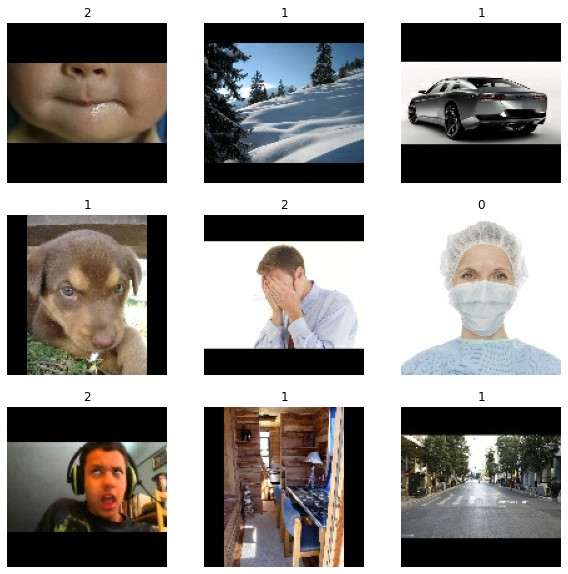

In [70]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## **Defining the Model**

This model structure was used as an example in another project, but it worked just fine here with a few modifications. First the data is scaled in the standard way. Next, the layers alternate between convolutions and maxpools three times and finally there's two fully connected layers in order to produce numbered classifications.

In [71]:
num_classes = 3
img_shape = (128, 128, 3)
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=img_shape),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

## **Compiling and Fitting the Model**

With mostly default parameters and using the 'adam' optimizer and 10 epochs we fit the model. I ran this on a CPU and it took about 10-15 minutes.

'SparseCategoricalCrossentropy' is used to calculate loss here since the labels are in integer form as opposed to one-hot vectors.

In [72]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [73]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=10,
)

Epoch 1/10
399/399 [==============================] - 85s 213ms/step - loss: 0.7124 - acc: 0.6898 - val_loss: 0.4188 - val_acc: 0.8391
Epoch 2/10
399/399 [==============================] - 86s 216ms/step - loss: 0.2327 - acc: 0.9178 - val_loss: 0.1245 - val_acc: 0.9589
Epoch 3/10
399/399 [==============================] - 86s 216ms/step - loss: 0.0653 - acc: 0.9795 - val_loss: 0.0470 - val_acc: 0.9865
Epoch 4/10
399/399 [==============================] - 86s 214ms/step - loss: 0.0246 - acc: 0.9927 - val_loss: 0.0058 - val_acc: 0.9994
Epoch 5/10
399/399 [==============================] - 85s 214ms/step - loss: 0.0237 - acc: 0.9922 - val_loss: 0.0234 - val_acc: 0.9937
Epoch 6/10
399/399 [==============================] - 92s 231ms/step - loss: 0.0269 - acc: 0.9918 - val_loss: 0.0017 - val_acc: 0.9997
Epoch 7/10
399/399 [==============================] - 87s 218ms/step - loss: 0.0032 - acc: 0.9988 - val_loss: 0.0013 - val_acc: 0.9997
Epoch 8/10
399/399 [==============================] - 8

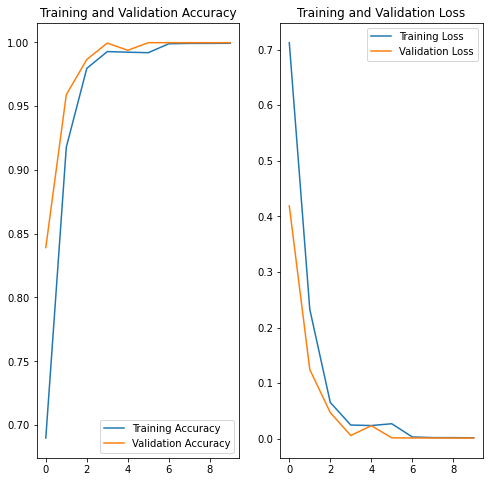

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Result**

As you can see the model quickly became highly accurate in classifying images. 